# CLEANING AND PREPROCESSING THE DATA
The provided data is in CSV format, containing columns such as `Category`, `Latitude`, `Longitude`, `Location Name`, and `Date`. The first step in training a model to provide crime statistics and identify areas prone to crime is to clean and preprocess the data. This would involve removing any unnecessary columns, converting categorical variables (such as type of crime) into numerical ones, and dealing with missing or invalid data.

To achieve this, we can use Python and pandas library to read in the CSV file, drop the `Location Name` column since it is unnecessary, encode the `Category` column using `LabelEncoder` from the `sklearn.preprocessing` library, and split the data into training and testing sets using train_test_split from the sklearn.model_selection library. The training data should contain 80% of the data, and the testing data should contain 20%. Finally, we set a random state for reproducibility purposes.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read in the data
df = pd.read_csv('fake_crime_reports.csv')

# Drop unnecessary columns
df.drop(['Location Name'], axis=1, inplace=True)

# Split the data into training and testing sets
X = df.drop(['Category'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df.head())

    Category  Latitude  Longitude        Date
0      theft -1.321039  36.945499  2022-07-18
1  vandalism -1.267184  36.767125  2023-01-03
2      theft -1.230830  36.921711  2022-07-31
3  vandalism -1.322356  36.853941  2022-05-10
4   burglary -1.303350  36.787716  2023-02-28


# VISUALIZING CRIME DATA
After cleaning and preprocessing the crime data, the next step is to explore the data using visualizations and descriptive statistics. This will help us gain insights into patterns and trends in the data. We will create different types of plots to achieve this.

Firstly, we will plot the frequency of different types of crimes using a bar chart. This will help us understand which types of crimes are most common in the data.

Secondly, we will identify areas with high crime rates using a scatter plot. This will help us visualize the location of the crimes and identify areas where crimes are more prevalent.

Lastly, we will examine relationships between different variables such as crime type and location using a pair plot. This will help us understand any correlations or patterns between different variables in the data.

To achieve this, we will be using two Python libraries, matplotlib and seaborn. These libraries provide tools for creating different types of plots that help us visualize the data and gain insights from it.

    Category  Latitude  Longitude        Date
0      theft -1.321039  36.945499  2022-07-18
1  vandalism -1.267184  36.767125  2023-01-03
2      theft -1.230830  36.921711  2022-07-31
3  vandalism -1.322356  36.853941  2022-05-10
4   burglary -1.303350  36.787716  2023-02-28


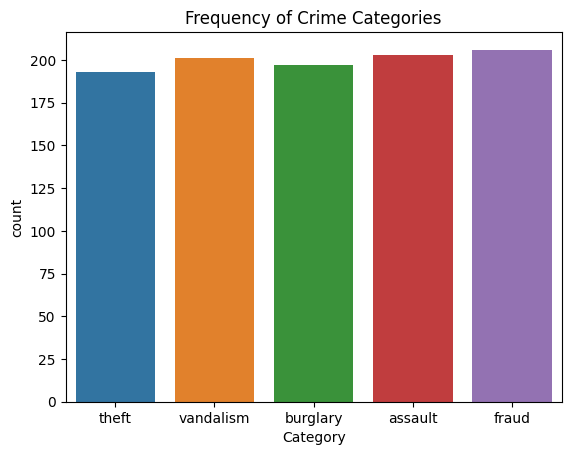

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())
# Countplot of crime categories
sns.countplot(x='Category', data=df)
plt.title('Frequency of Crime Categories')
plt.show()

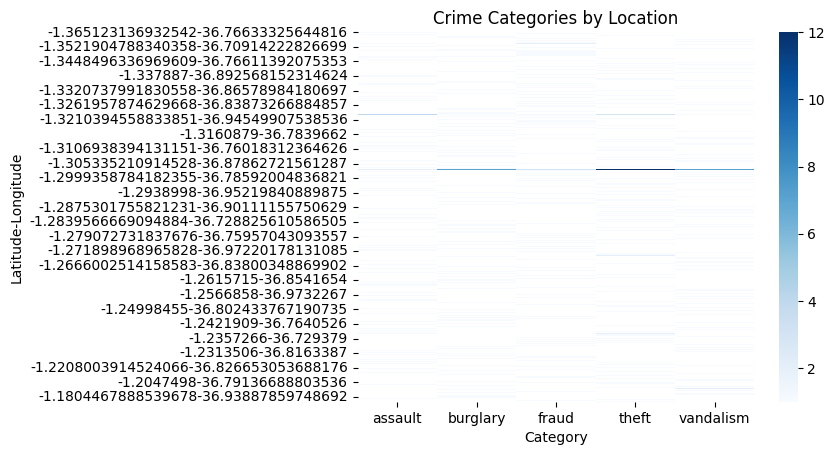

In [14]:
# Heatmap of crime categories by location
crime_location = df.groupby(['Latitude', 'Longitude'])['Category'].value_counts().unstack()
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Categories by Location')
plt.show()

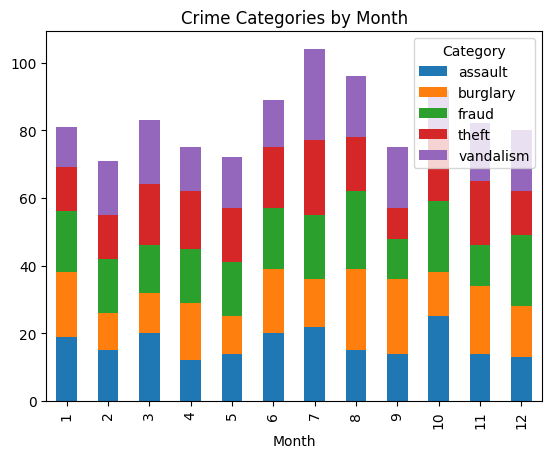

In [15]:

# Barplot of crime categories by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df_month = df.groupby(['Month', 'Category']).size().unstack()
df_month.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Month')
plt.show()

In [17]:
# Descriptive statistics of crime data
print(df.describe())

          Latitude    Longitude        Month
count  1000.000000  1000.000000  1000.000000
mean     -1.285071    36.834647     6.619000
std       0.044961     0.084555     3.387228
min      -1.365123    36.655753     1.000000
25%      -1.320554    36.770393     4.000000
50%      -1.289263    36.837677     7.000000
75%      -1.251747    36.902619    10.000000
max      -1.165204    36.994686    12.000000


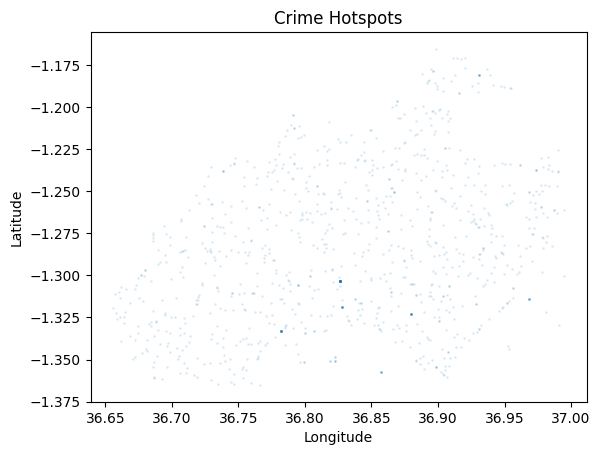

In [19]:
# Identify areas with high crime rates
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


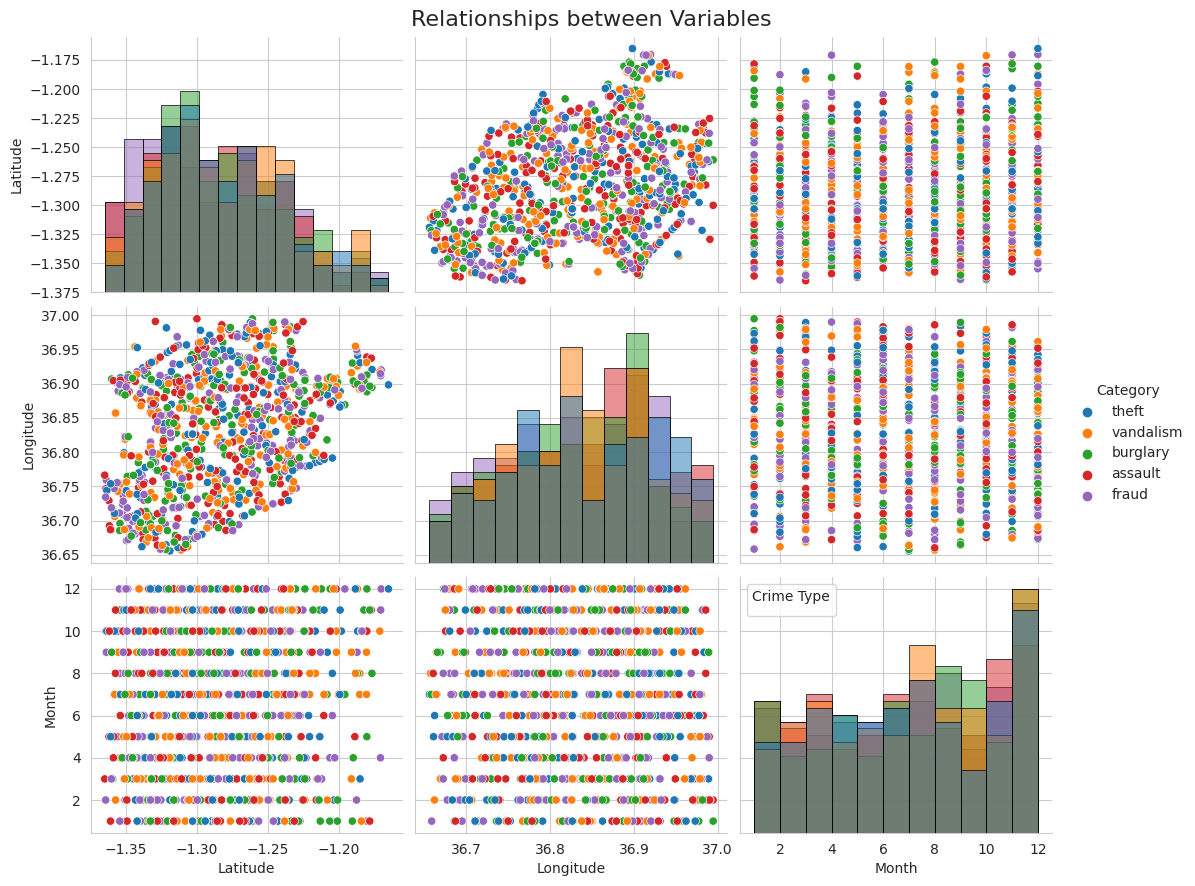

In [22]:
# Plot relationships between variables
sns.set_style("whitegrid")
sns.pairplot(df, hue='Category', height=3, aspect=1.2, diag_kind="hist", diag_kws=dict(edgecolor="k", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationships between Variables', fontsize=16)
plt.legend(title='Crime Type')
plt.show()
